<a href="https://colab.research.google.com/github/Syntax-code/Machine-Learning/blob/master/iris_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle --upgrade
!kaggle --version
from google.colab import files
files.upload()

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kartikchourasiya","key":"807c8d14f49cd514a2015f84a2a567f1"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#chamge permission
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d uciml/iris

  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 6.61MB/s]


In [4]:
!unzip iris.zip

Archive:  iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [16]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
map_Species = {
    'Iris-setosa' : 0,
    'Iris-versicolor' : 1,
    'Iris-virginica' : 2
}
df['Species'] = df['Species'].map(map_Species)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [19]:
df['Species'].unique()

array([0, 1, 2])

In [23]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[1:4]], df[df.columns[5]], random_state = 0)

In [26]:
print(x_train.head(), y_train.head())

     SepalLengthCm  SepalWidthCm  PetalLengthCm
61             5.9           3.0            4.2
92             5.8           2.6            4.0
112            6.8           3.0            5.5
2              4.7           3.2            1.3
141            6.9           3.1            5.1 61     1
92     1
112    2
2      0
141    2
Name: Species, dtype: int64


1 : 0.5789473684210527
2 : 0.8947368421052632
3 : 0.8947368421052632
4 : 0.9473684210526315
5 : 0.9473684210526315


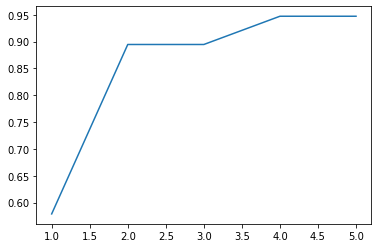

In [32]:
max_depth_range = list(range(1,6))
accuracy = []
for depth in max_depth_range:
  dtc = DecisionTreeClassifier(max_depth = depth, random_state = 0)
  dtc.fit(x_train, y_train)
  score = dtc.score(x_test, y_test)
  accuracy.append(score)
plt.plot(range(1,6), accuracy)
for x in range(0,5):
  print(x+1, ':', accuracy[x])

<BarContainer object of 5 artists>

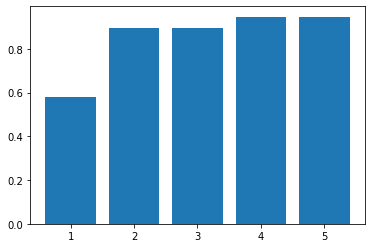

In [34]:
plt.bar(range(1,6), accuracy)